# Windows 10, py-visa

Testing on more platforms.

In [1]:
import pyvisa
rm = pyvisa.ResourceManager()
rm.list_resources()

('USB0::0x1AB1::0x0588::DS1EU152500705::INSTR', 'ASRL4::INSTR')

In [2]:
scope = rm.open_resource('USB0::0x1AB1::0x0588::DS1EU152500705::INSTR')

Get Scope Info

In [7]:
scope.query("*IDN?")

'Rigol Technologies,DS1052D,DS1EU152500705,00.04.02.01.00'

In [9]:
Reset Scope

SyntaxError: invalid syntax (<ipython-input-9-d0bf6ab1d658>, line 1)

In [10]:
scope.write("*RST")

(6, <StatusCode.success: 0>)

In [18]:
import mhs5200

signal_gen = mhs5200.MHS5200("COM4")

for chan in signal_gen.channels:
    chan.frequency = 0.5
    chan.amplitude = 10
    chan.offset = 5
    chan.duty_cycle=50

In [25]:
scope.query(":CHANNEL1:DISPLAY?")

'0'

In [29]:
len(":CHANNEL1:DISPLAY 0")

19

In [30]:
command = ":CHANNEL1:DISPLAY 0"

In [35]:
bytes_written, status_code = scope.write(command)
assert len(command)+2==bytes_written
assert status_code==0

In [36]:
scope.query(":CHANNEL1:DISPLAY?")

'0'

In [39]:
scope.query_ascii_values(":CHANNEL1:DISPLAY?")

[0.0]

In [40]:
scope.query_ascii_values(":CHANNEL1:DISPLAY?")[0]==0

True

In [42]:
scope.query(":DISPLAY:TYPE?")

'VECTORS'

In [41]:
scope.query(":DISPLAY:GRID?")

'FULL'

In [43]:
scope.query(":DISPLAY:PERSIST?")

'OFF'

In [53]:
scope.write(":KEY:FORCE")

(12, <StatusCode.success: 0>)

In [49]:
for channel in [1, 2]:
    for setting in ["BWLIMIT", "COUPLING", "DISPLAY", "INVERT", "OFFSET", "PROBE", "SCALE", "FILTER", "MEMORYDEPTH", "VERNIER"]:
        try:
            result = scope.query(f":CHANNEL{channel}:{setting}?")
            print(f"{channel}:{setting}:{result}")
        except:
            print(f"FAILED: {channel}:{setting}")

1:BWLIMIT:OFF
1:COUPLING:DC
1:DISPLAY:0
1:INVERT:OFF
1:OFFSET:1.000e-01
1:PROBE:1.000e+00
1:SCALE:1.000e-01
1:FILTER:OFF
1:MEMORYDEPTH:16384
1:VERNIER:Coarse
2:BWLIMIT:OFF
2:COUPLING:DC
2:DISPLAY:1
2:INVERT:OFF
2:OFFSET:-1.000e-01
2:PROBE:1.000e+00
2:SCALE:1.000e-01
2:FILTER:OFF
2:MEMORYDEPTH:16384
2:VERNIER:Coarse


In [54]:
channel_settings = dict()
for channel in [1, 2]:
    channel_settings[channel]=dict()
    for setting in ["BWLIMIT", "COUPLING", "DISPLAY", "INVERT", "OFFSET", "PROBE", "SCALE", "FILTER", "MEMORYDEPTH", "VERNIER"]:
        try:
            result = scope.query(f":CHANNEL{channel}:{setting}?")
            print(f"{channel}:{setting}:{result}")
            channel_settings[channel][setting.lower()]=result
        except:
            print(f"FAILED: {channel}:{setting}")

1:BWLIMIT:OFF
1:COUPLING:DC
1:DISPLAY:1
1:INVERT:OFF
1:OFFSET:6.480e+00
1:PROBE:1.000e+00
1:SCALE:2.000e+00
1:FILTER:OFF
1:MEMORYDEPTH:6240
1:VERNIER:Coarse
2:BWLIMIT:OFF
2:COUPLING:DC
2:DISPLAY:1
2:INVERT:OFF
2:OFFSET:-6.680e-01
2:PROBE:1.000e+00
2:SCALE:2.000e-01
2:FILTER:OFF
2:MEMORYDEPTH:6240
2:VERNIER:Coarse


In [52]:
channel_settings

{1: {'bwlimit': 'OFF',
  'coupling': 'DC',
  'display': '1',
  'invert': 'OFF',
  'offset': '6.480e+00',
  'probe': '1.000e+00',
  'scale': '2.000e+00',
  'filter': 'OFF',
  'memorydepth': '8192',
  'vernier': 'Coarse'},
 2: {'bwlimit': 'OFF',
  'coupling': 'DC',
  'display': '1',
  'invert': 'OFF',
  'offset': '-6.680e-01',
  'probe': '1.000e+00',
  'scale': '2.000e-01',
  'filter': 'OFF',
  'memorydepth': '8192',
  'vernier': 'Coarse'}}

In [55]:
channel_settings

{1: {'bwlimit': 'OFF',
  'coupling': 'DC',
  'display': '1',
  'invert': 'OFF',
  'offset': '6.480e+00',
  'probe': '1.000e+00',
  'scale': '2.000e+00',
  'filter': 'OFF',
  'memorydepth': '6240',
  'vernier': 'Coarse'},
 2: {'bwlimit': 'OFF',
  'coupling': 'DC',
  'display': '1',
  'invert': 'OFF',
  'offset': '-6.680e-01',
  'probe': '1.000e+00',
  'scale': '2.000e-01',
  'filter': 'OFF',
  'memorydepth': '6240',
  'vernier': 'Coarse'}}

In [ ]:
def diff_dict(dict1, dict2):
    for key, value in dict1.times():
        if

In [ ]:
class Channel(object):
    pass

In [58]:
scope.write_ascii_values(":CHANNEL1:OFFSET", [0, ])

(26, <StatusCode.success: 0>)

In [59]:
scope.write(":CHANNEL1:OFFSET 0")

(20, <StatusCode.success: 0>)

In [73]:
channel_settings = dict()
for channel in [1, 2]:
    scope.write(f":CHANNEL{channel}:OFFSET 0")

In [74]:
channel_settings = dict()
for channel in [1, 2]:
    scope.write(f":CHANNEL{channel}:scale 2")

In [75]:
channel_settings = dict()
for channel in [1, 2]:
    scope.write(f":CHANNEL{channel}:scale 2.000eS+00")

In [76]:
import time

In [77]:
channel_settings = dict()
for channel in [1, 2]:
    scope.write(f":CHANNEL{channel}:scale 2.000e-01")
    time.sleep(0.1)

In [ ]:
channel_settings = dict()
for channel in [1, 2]:
    scope.write(f":CHANNEL{channel}:scale 2.000e-01")
    time.sleep(0.1)

In [78]:
import re

In [4]:
import re

In [5]:
docs = """:KEY:STORage 2-80              :MEASure:VPP? 2-60
:KEY:UTILity 2-81              :MEASure:VMAX? 2-60
:KEY:MNUTIME 2-81              :MEASure:VMIN?     2-60
:KEY:MNUTRIG 2-81              :MEASure:VAMPlitude? 2-61
:KEY:Trig%50 2-81              :MEASure:VTOP? 2-61
:KEY:FORCe 2-82                :MEASure:VBASe? 2-61
:KEY:V_POS_INC 2-82            :MEASure:VAVerage?     2-62
:KEY:V_POS_DEC 2-82            :MEASure:VRMS?     2-62
:KEY:V_SCALE_INC 2-82          :MEASure:OVERshoot? 2-62
:KEY:V_SCALE_DEC 2-83          :MEASure:PREShoot?     2-63
:KEY:H_SCALE_INC 2-83          :MEASure:FREQuency? 2-63
:KEY:H_SCALE_DEC 2-83          :MEASure:RISetime? 2-63
:KEY:TRIG_LVL_INC 2-83         :MEASure:FALLtime? 2-64
:KEY:TRIG_LVL_DEC 2-83         :MEASure:PERiod? 2-64
:KEY:H_POS_INC 2-84            :MEASure:PWIDth? 2-64
:KEY:H_POS_DEC 2-84            :MEASure:NWIDth? 2-65
:KEY:PROMPT_V 2-84             :MEASure:PDUTycycle?      2-65
:KEY:PROMPT_H 2-84             :MEASure:NDUTycycle? 2-65
:KEY:FUNCtion 2-85             :MEASure:PDELay?     2-66
:KEY:+FUNCtion 2-85            :MEASure:NDELay?     2-66
:KEY:-FUNCtion 2-85            :MEASure:TOTal 2-66
:KEY:LA 2-85                   :MEASure:SOURce 2-67"""

In [6]:
measure_re = re.compile("(:MEASure:[\w]+\??)")

In [7]:
for query in measure_re.findall(docs):
    print(query) 

:MEASure:VPP?
:MEASure:VMAX?
:MEASure:VMIN?
:MEASure:VAMPlitude?
:MEASure:VTOP?
:MEASure:VBASe?
:MEASure:VAVerage?
:MEASure:VRMS?
:MEASure:OVERshoot?
:MEASure:PREShoot?
:MEASure:FREQuency?
:MEASure:RISetime?
:MEASure:FALLtime?
:MEASure:PERiod?
:MEASure:PWIDth?
:MEASure:NWIDth?
:MEASure:PDUTycycle?
:MEASure:NDUTycycle?
:MEASure:PDELay?
:MEASure:NDELay?
:MEASure:TOTal
:MEASure:SOURce


In [14]:
for query in measure_re.findall(docs):
    n = (query.split(":")[2].strip("?"))
    print(f"'{n}',",)

'VPP',
'VMAX',
'VMIN',
'VAMPlitude',
'VTOP',
'VBASe',
'VAVerage',
'VRMS',
'OVERshoot',
'PREShoot',
'FREQuency',
'RISetime',
'FALLtime',
'PERiod',
'PWIDth',
'NWIDth',
'PDUTycycle',
'NDUTycycle',
'PDELay',
'NDELay',
'TOTal',
'SOURce',


In [8]:
if query.endswith("?"):
    getter = query
    setter = None
else:
    value = "1"
    getter = f"{query}?"
    setter = f"{query} {value}"

In [102]:
scope.query(getter)

'CH2'

In [103]:
scope.write(setter)

(19, <StatusCode.success: 0>)

In [104]:
scope.query(getter)

'CH2'

In [106]:
setter

':MEASure:SOURce 1'

In [108]:
scope.write(":STOP")

(7, <StatusCode.success: 0>)

In [109]:
scope.write(":RUN")

(6, <StatusCode.success: 0>)

In [116]:
for query in measure_re.findall(docs):
    if query.endswith("?"):
        getter = query
        setter = None
    else:
        value = "1"
        getter = f"{query}?"
        setter = f"{query} CH{value}"
    try:
        resp = scope.query_ascii_values(getter)
    except:
        resp = scope.query(getter)
    print(f"{query}: {resp}")

:MEASure:VPP?: [1.2]
:MEASure:VMAX?: [0.64]
:MEASure:VMIN?: [-0.56]
:MEASure:VAMPlitude?: [1.12]
:MEASure:VTOP?: [0.599]
:MEASure:VBASe?: [-0.519]
:MEASure:VAVerage?: [0.0433]
:MEASure:VRMS?: [0.56]
:MEASure:OVERshoot?: [0.0365]
:MEASure:PREShoot?: [0.0365]
:MEASure:FREQuency?: [0.49]
:MEASure:RISetime?: <1.00e-01
:MEASure:FALLtime?: <6.00e-02
:MEASure:PERiod?: [2.04]
:MEASure:PWIDth?: [1.04]
:MEASure:NWIDth?: [1.0]
:MEASure:PDUTycycle?: [0.51]
:MEASure:NDUTycycle?: [0.49]
:MEASure:PDELay?: <-2.00e-01
:MEASure:NDELay?: <-2.00e-01
:MEASure:TOTal: OFF
:MEASure:SOURce: CH2


In [117]:
scope.write(setter)

(21, <StatusCode.success: 0>)

In [120]:
scope.write(":MEASURE:TOTAL ON")

(19, <StatusCode.success: 0>)

In [121]:
scope.write(":MEASURE:SOURCE CH1")

(21, <StatusCode.success: 0>)

In [122]:
scope.write(":MEASURE:SOURCE CHAN1")

(23, <StatusCode.success: 0>)

In [123]:
scope.write(":MEASURE:SOURCE CHAN2")

(23, <StatusCode.success: 0>)

In [125]:
scope.query(":TRIGger:EDGE:SLOPe?")

'POSITIVE'

In [126]:
scope.query(":TRIGger:MODE?")

'EDGE'

In [130]:
data = scope.query_binary_values(":WAVEFORM:DATA? CHAN1")

In [131]:
import matplotlib.pyplot as plt

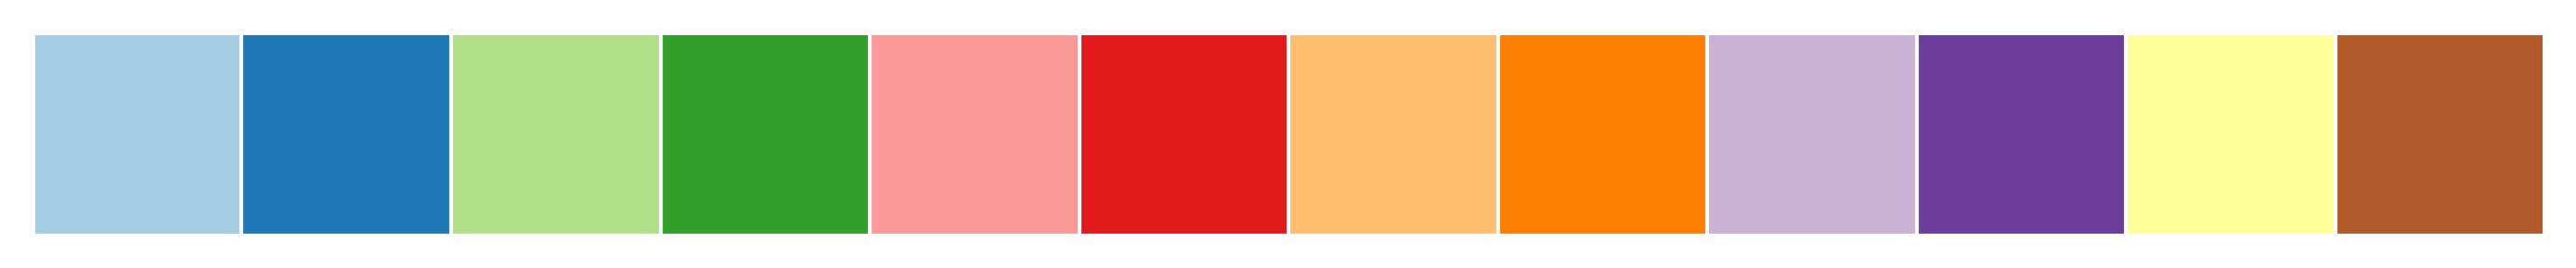

In [133]:
import seaborn as sns

sns.set(
    rc={
        "figure.figsize": (11, 8.5),
        "figure.dpi": 300,
        "figure.facecolor": "w",
        "figure.edgecolor": "k",
    }
)
palette = (sns.color_palette("Paired"))
sns.palplot(palette)
sns.set_palette(palette)

Text(0, 0.5, 'Datapoint Value')

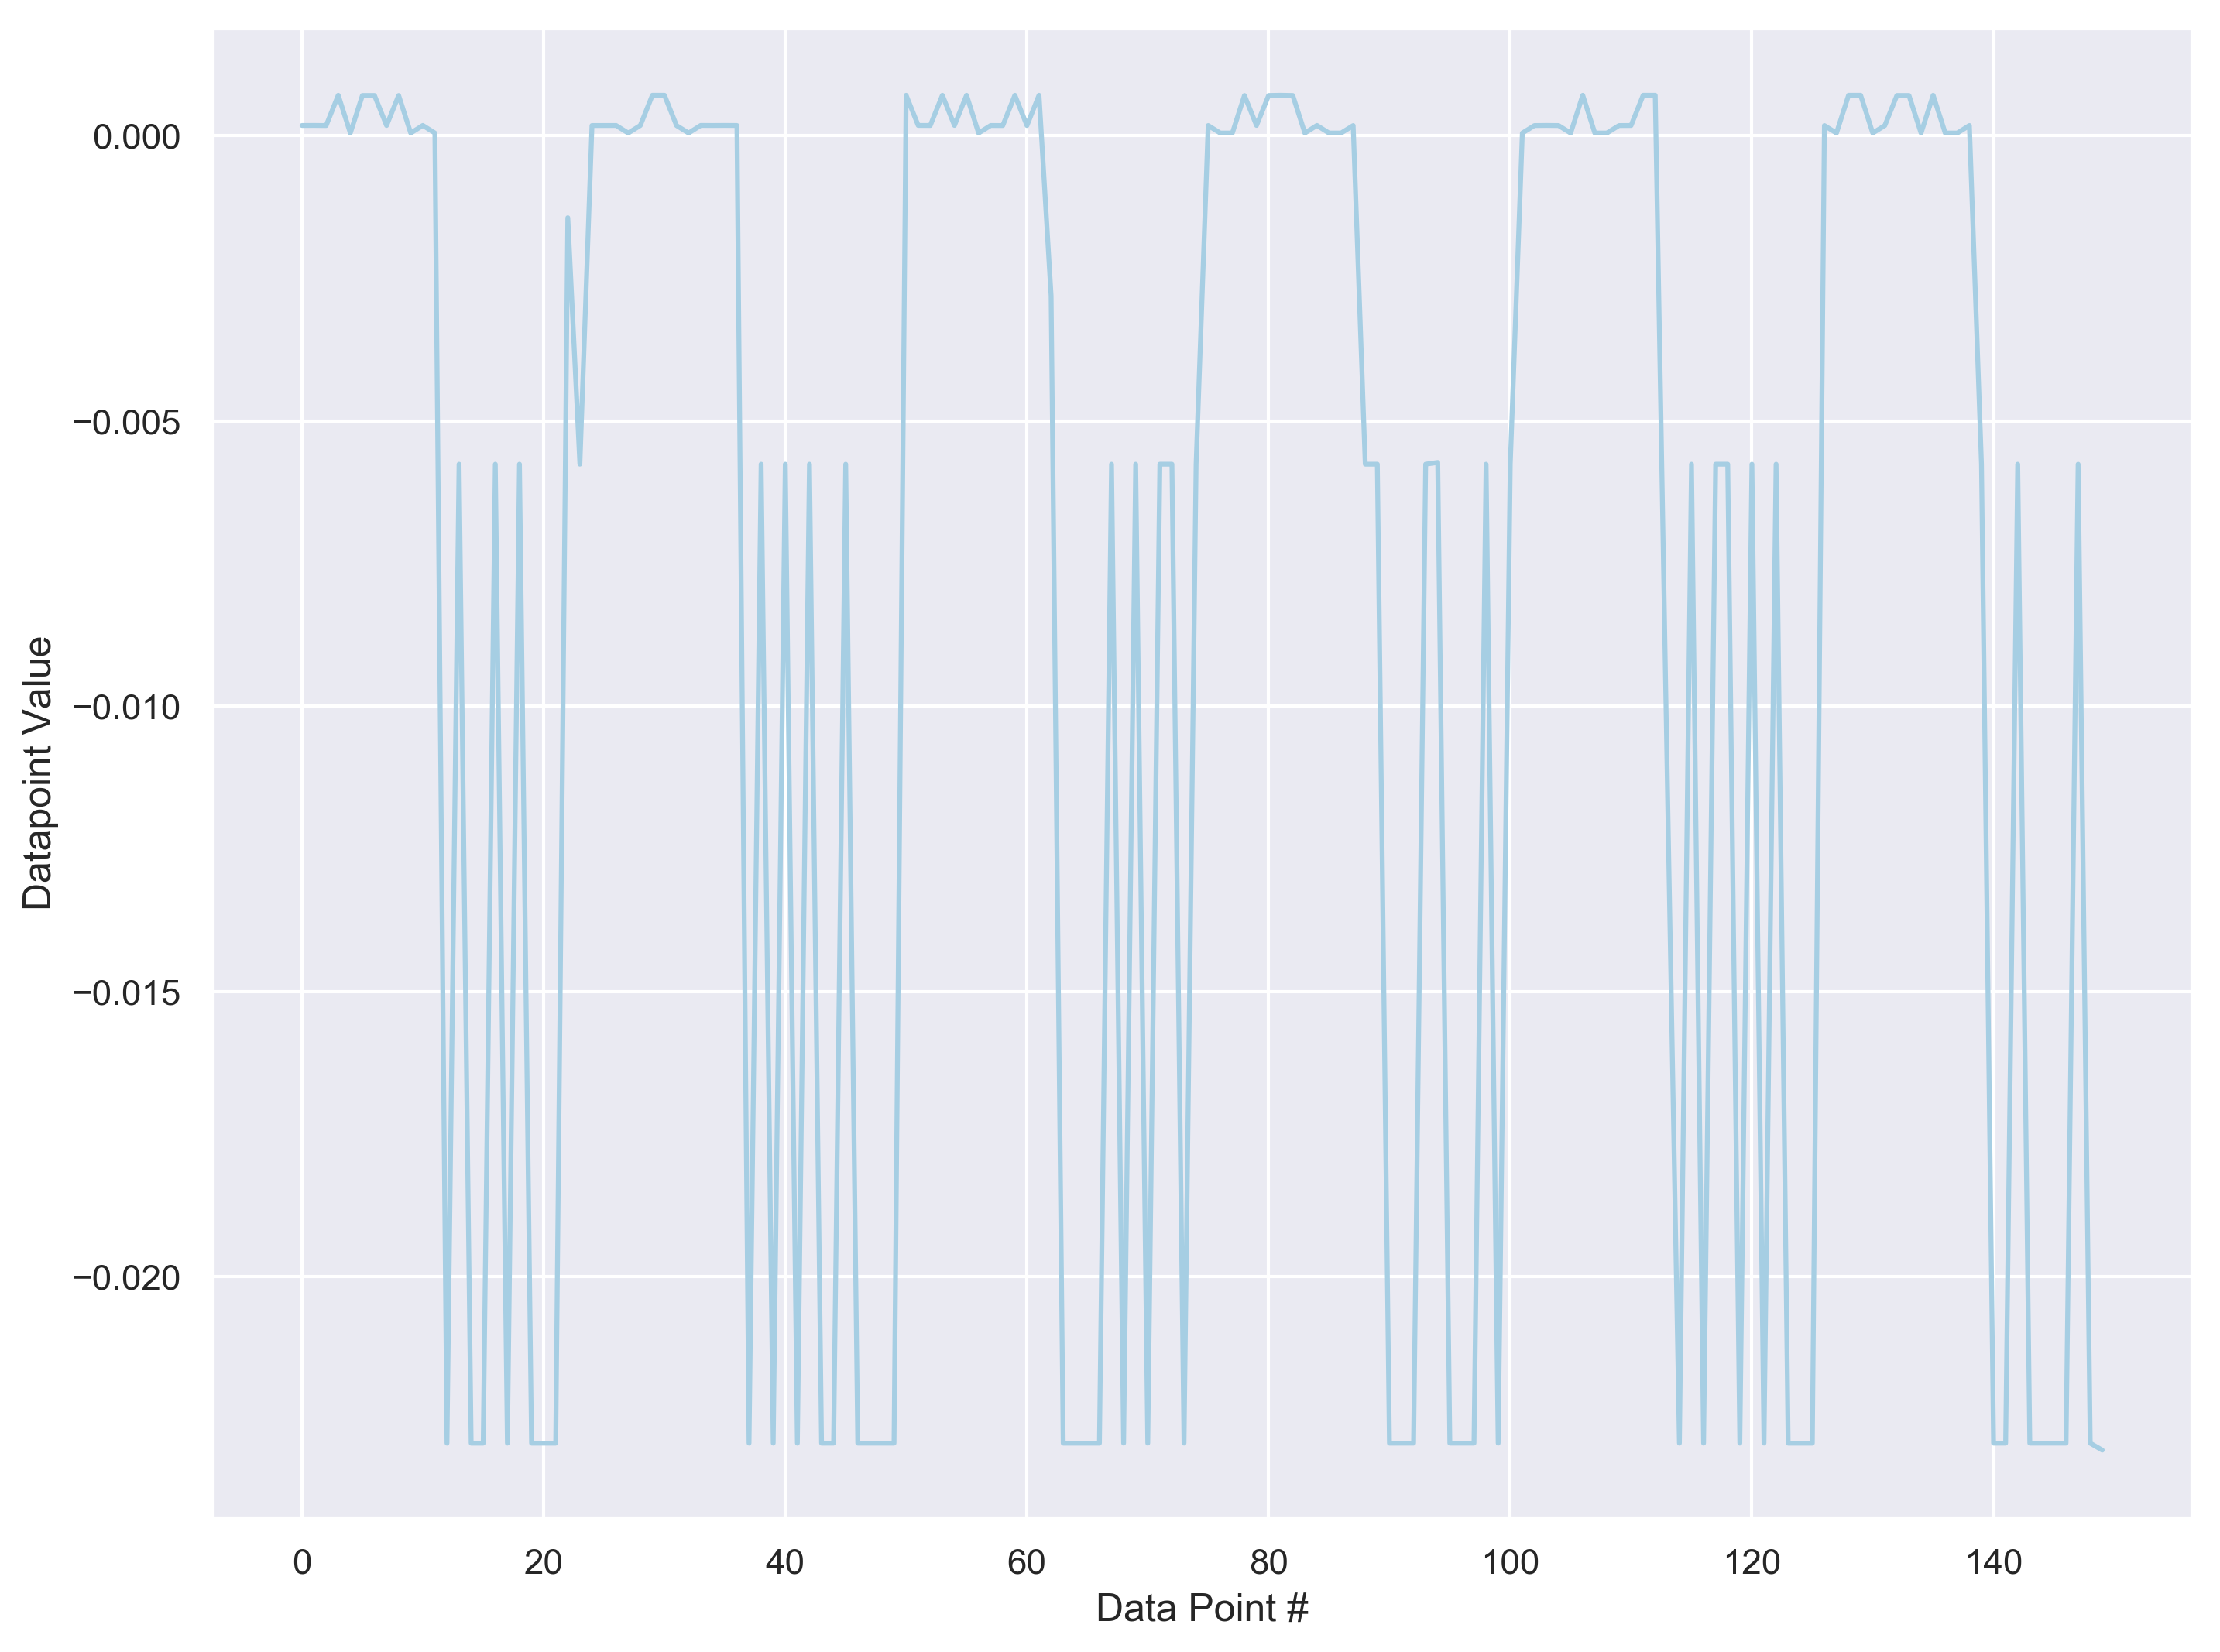

In [136]:
ax = plt.plot(data)
plt.xlabel("Data Point #")
plt.ylabel("Datapoint Value")

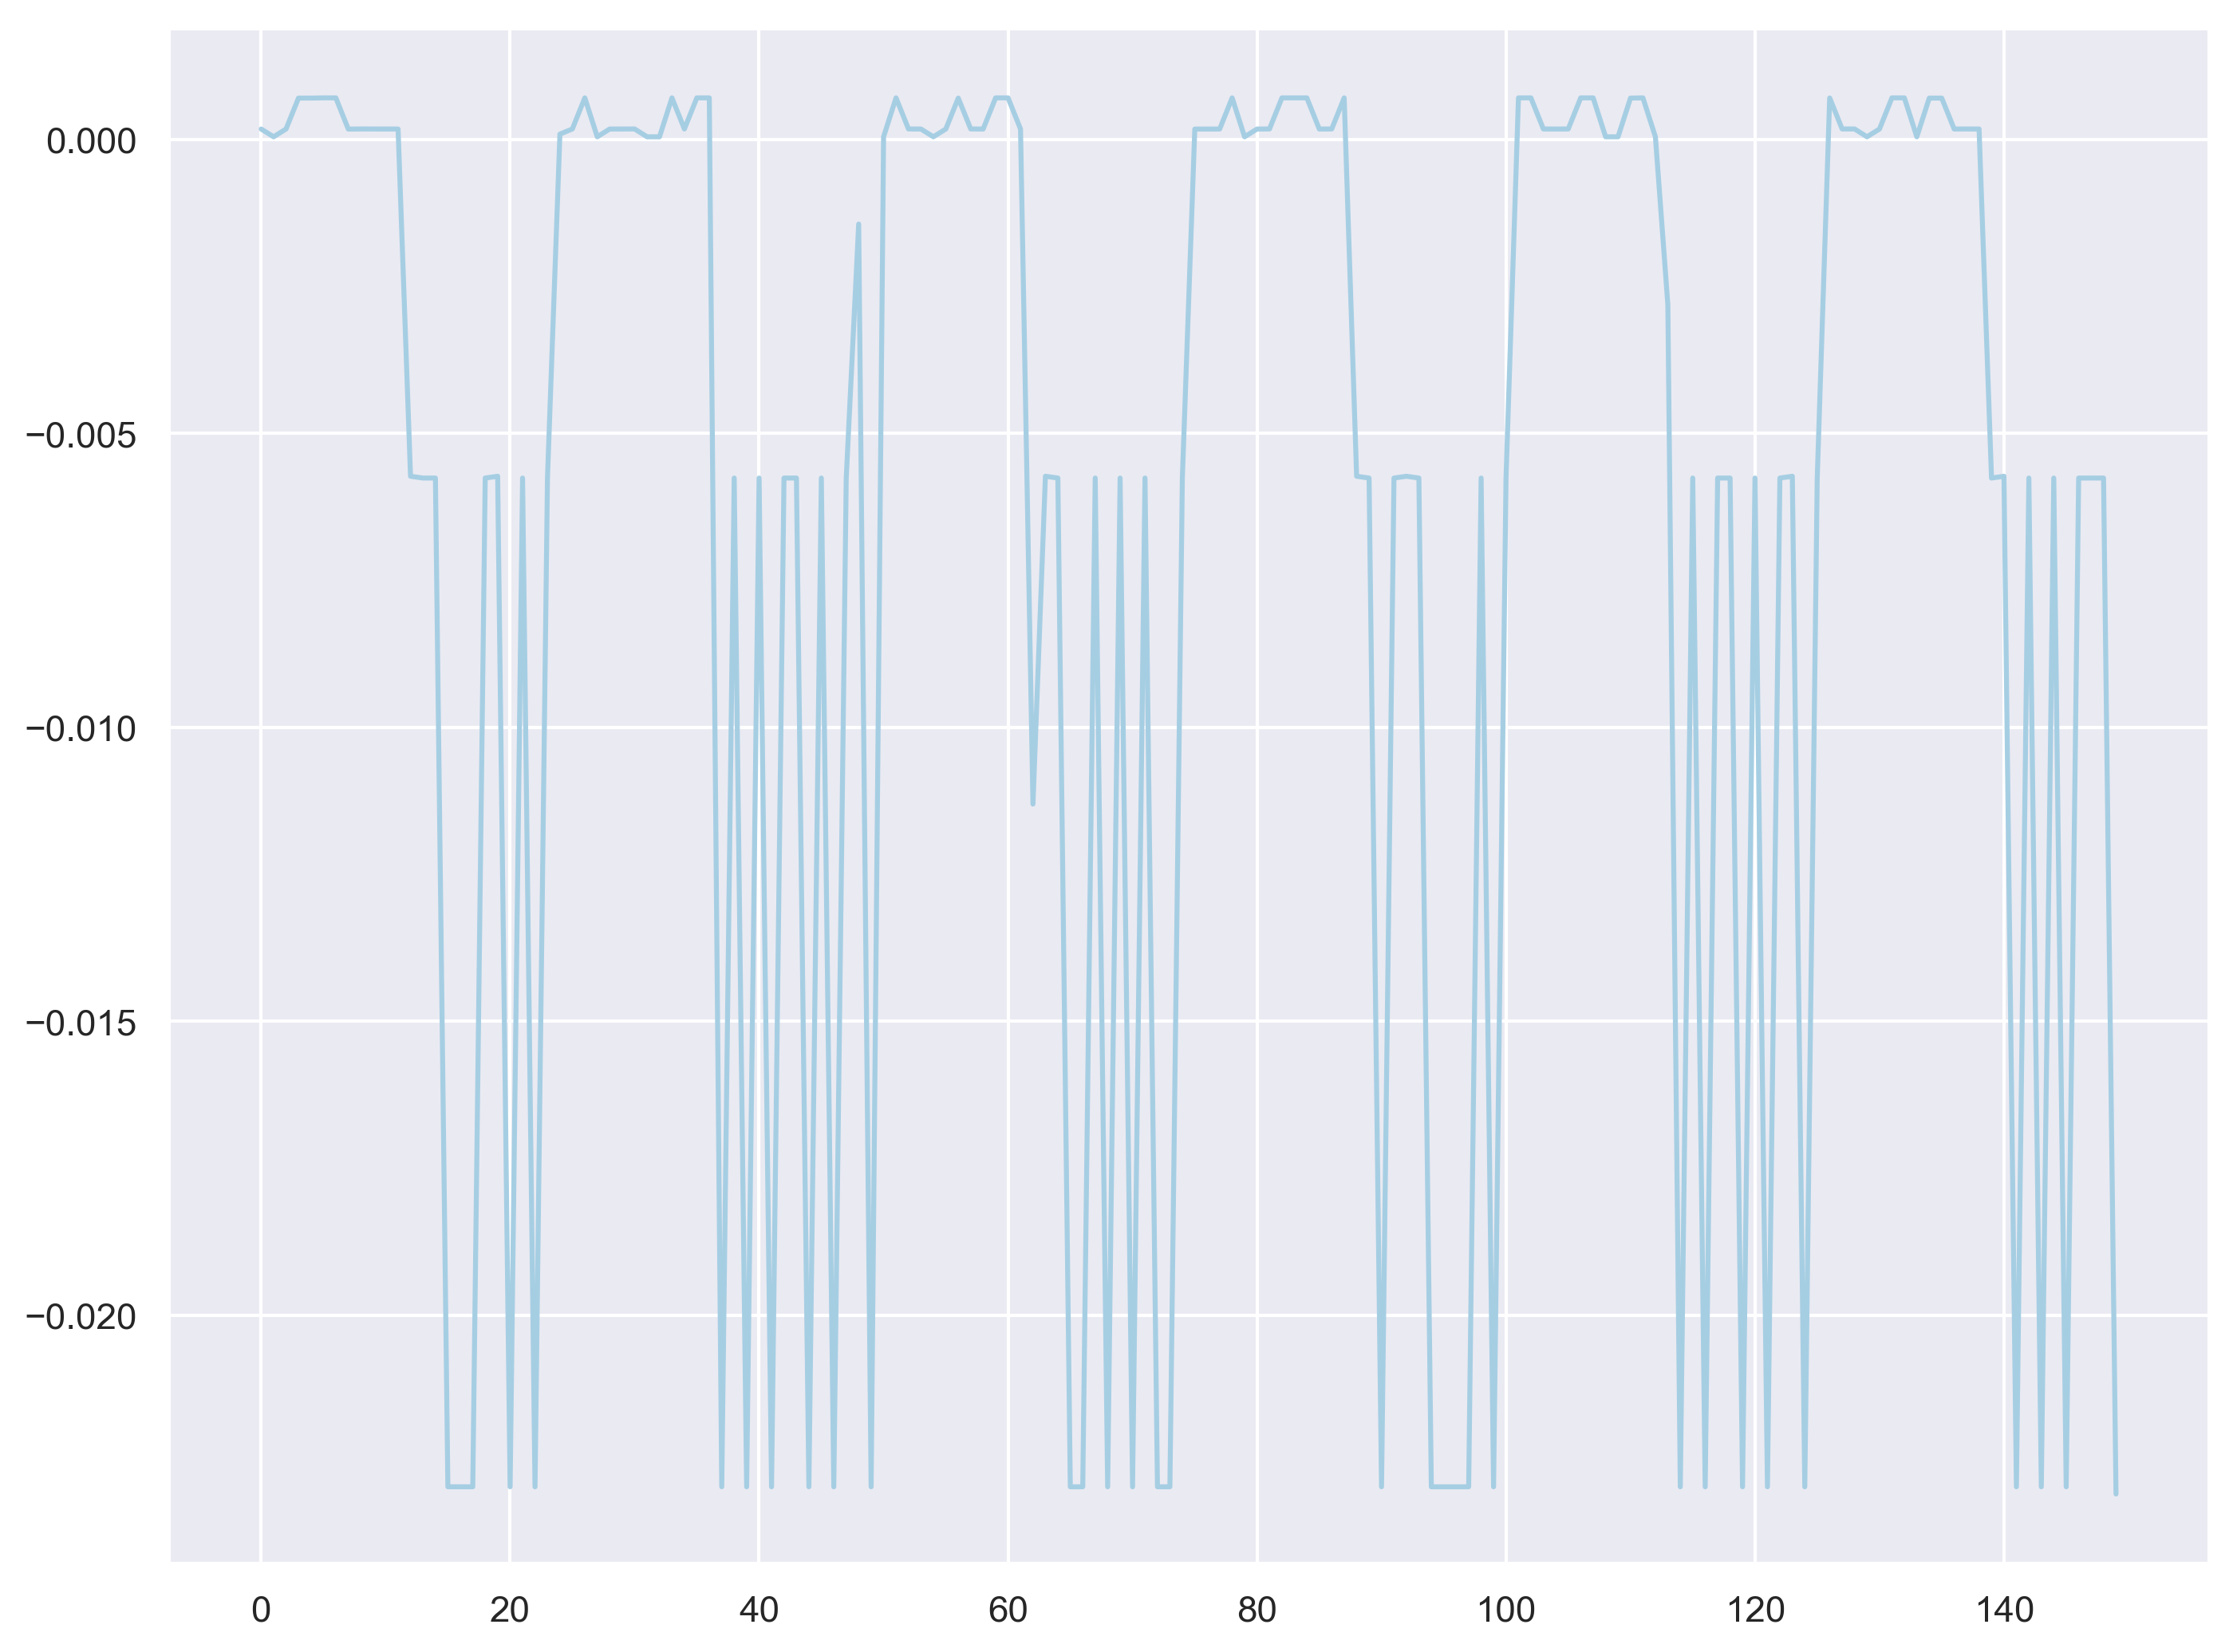

In [139]:
data = scope.query_binary_values(":WAVEFORM:DATA? CHAN1")
plt.plot(data)

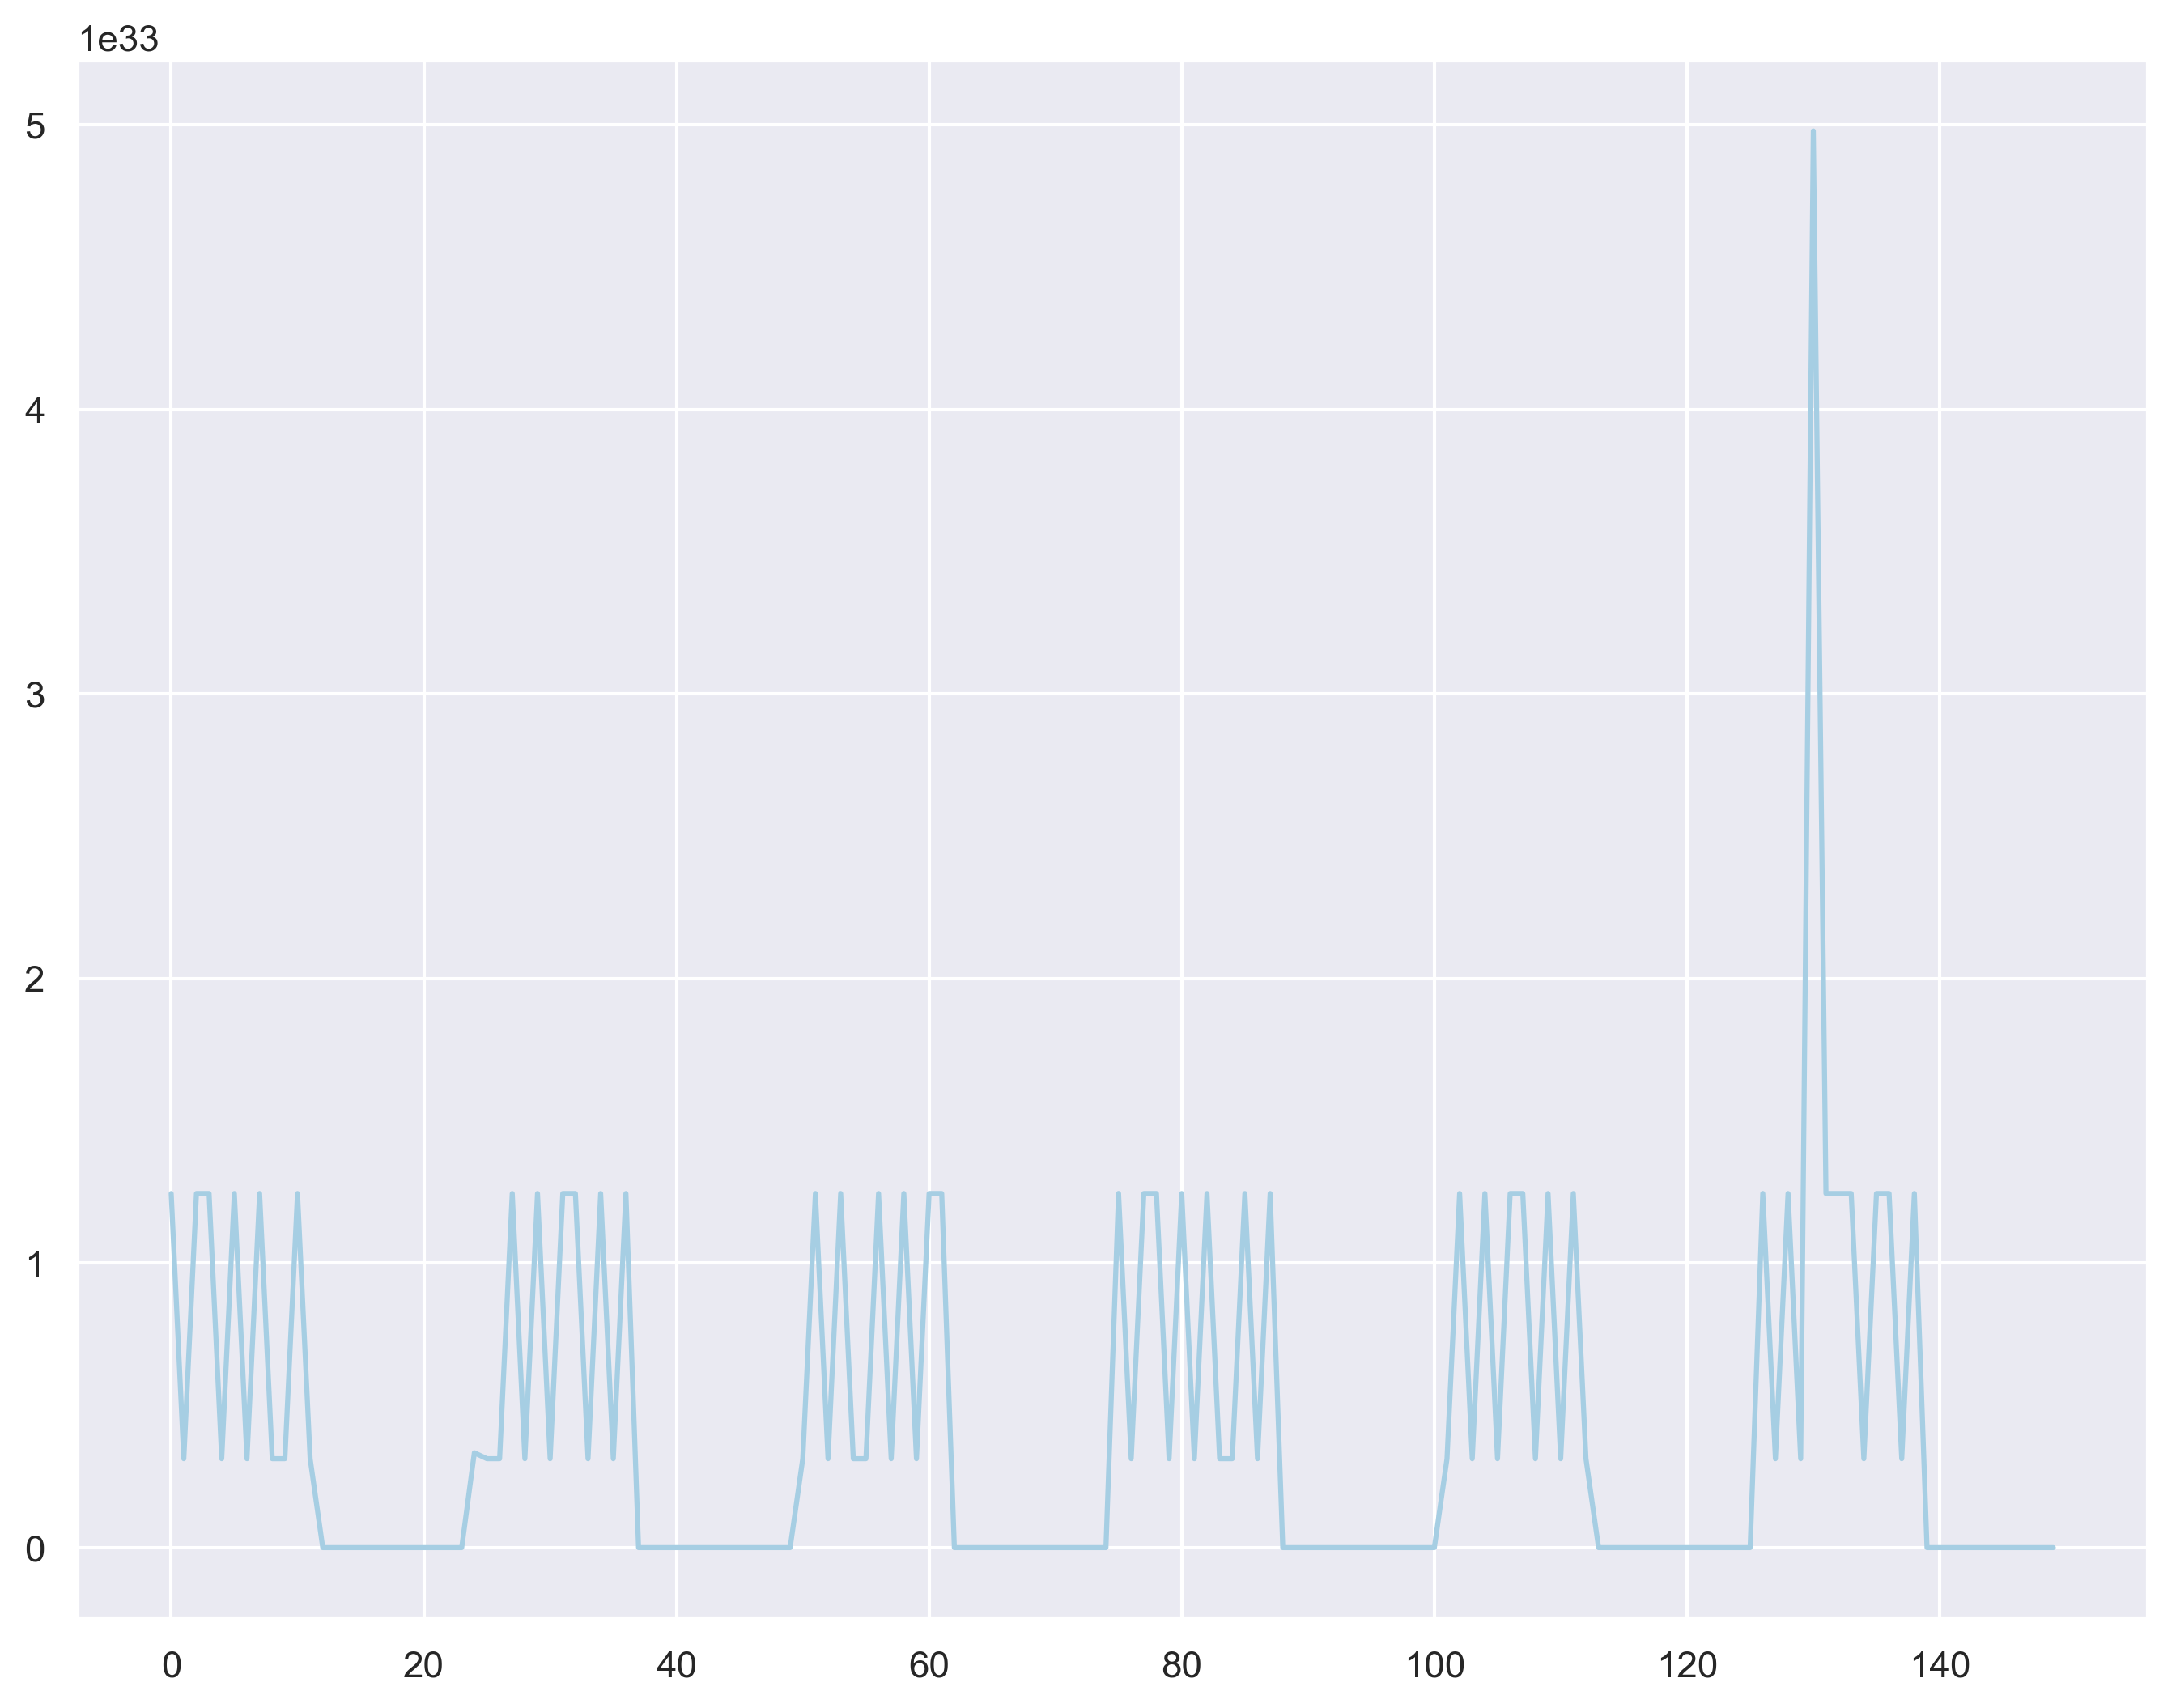

In [141]:
data = scope.query_binary_values(":WAVEFORM:DATA? CHAN2")
plt.plot(data)

In [142]:
scope.query(":ACQ:SAMP? CHANnel2")

'682.666687'

In [146]:
scope.query(":ACQ:MEMD?")

'LONG'

In [145]:
scope.write(":ACQ:MEMD LONG")

(16, <StatusCode.success: 0>)

In [148]:
for depth in ["NORMAL", "LONG"]:
    scope.write(f":ACQ:MEMD {depth}")
    time.sleep(0.5)
    assert depth == scope.query(":ACQ:MEMD?")

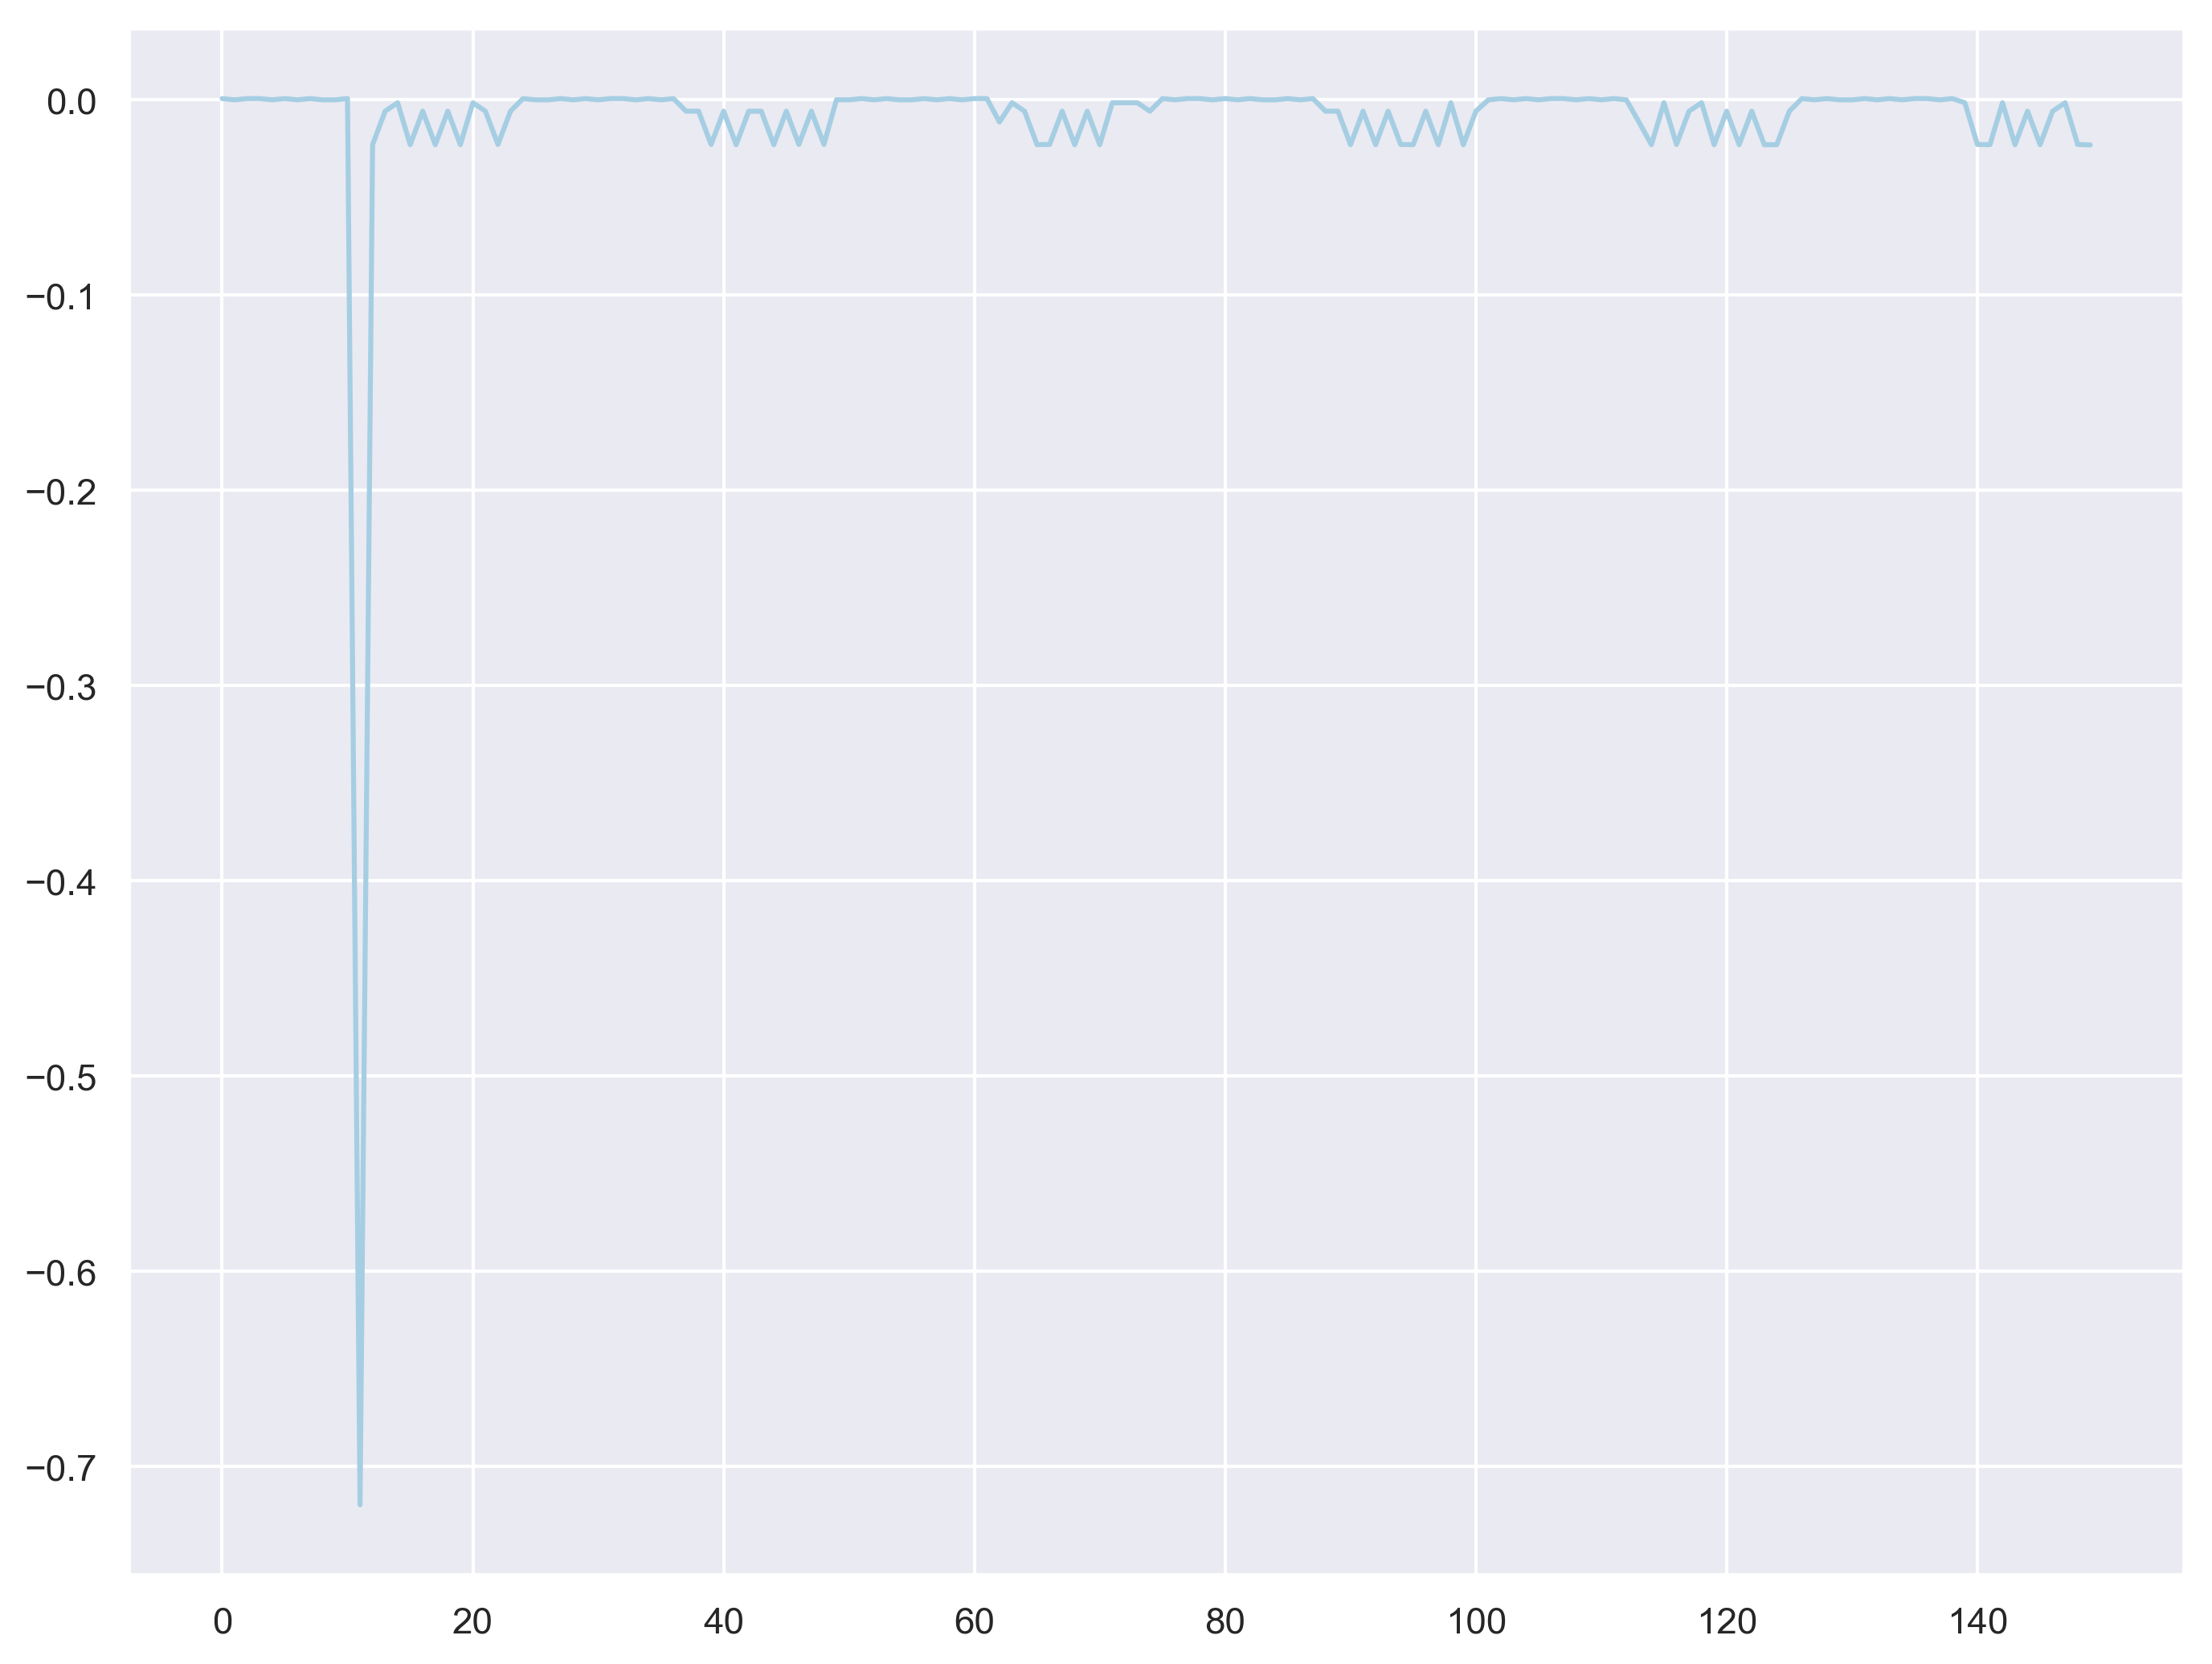

In [156]:
data = scope.query_binary_values(":WAVEFORM:DATA? CHAN1")
plt.plot(data)

In [157]:
len(data)

150

In [158]:
?scope.query_binary_values

In [160]:
scope.query(":WAVEFORM:POINTS:MODE?")

'RAW'

In [199]:
scope.write(":WAVEFORM:DATA? CHANNEL1")
header = scope.read_raw()[:10]
header

b'#800000600'

In [209]:
scope.write(":WAVEFORM:DATA? CHANNEL1")
data = scope.read_raw()[10:]

In [194]:
data[0]

56

In [195]:
data[0:1]

b'8'

In [193]:
data[0:2]

b'88'

In [196]:
import numpy as np

In [201]:
np.array(56).tobytes()

b'8\x00\x00\x00'

In [206]:
np.array(56).tobytes("C")

b'8\x00\x00\x00'

In [207]:
np.array(56).tobytes("F")

b'8\x00\x00\x00'

In [208]:
np.array(56.0).tobytes("F")

b'\x00\x00\x00\x00\x00\x00L@'

In [210]:
np.frombuffer(np.array(56).tobytes("F"))

ValueError: buffer size must be a multiple of element size

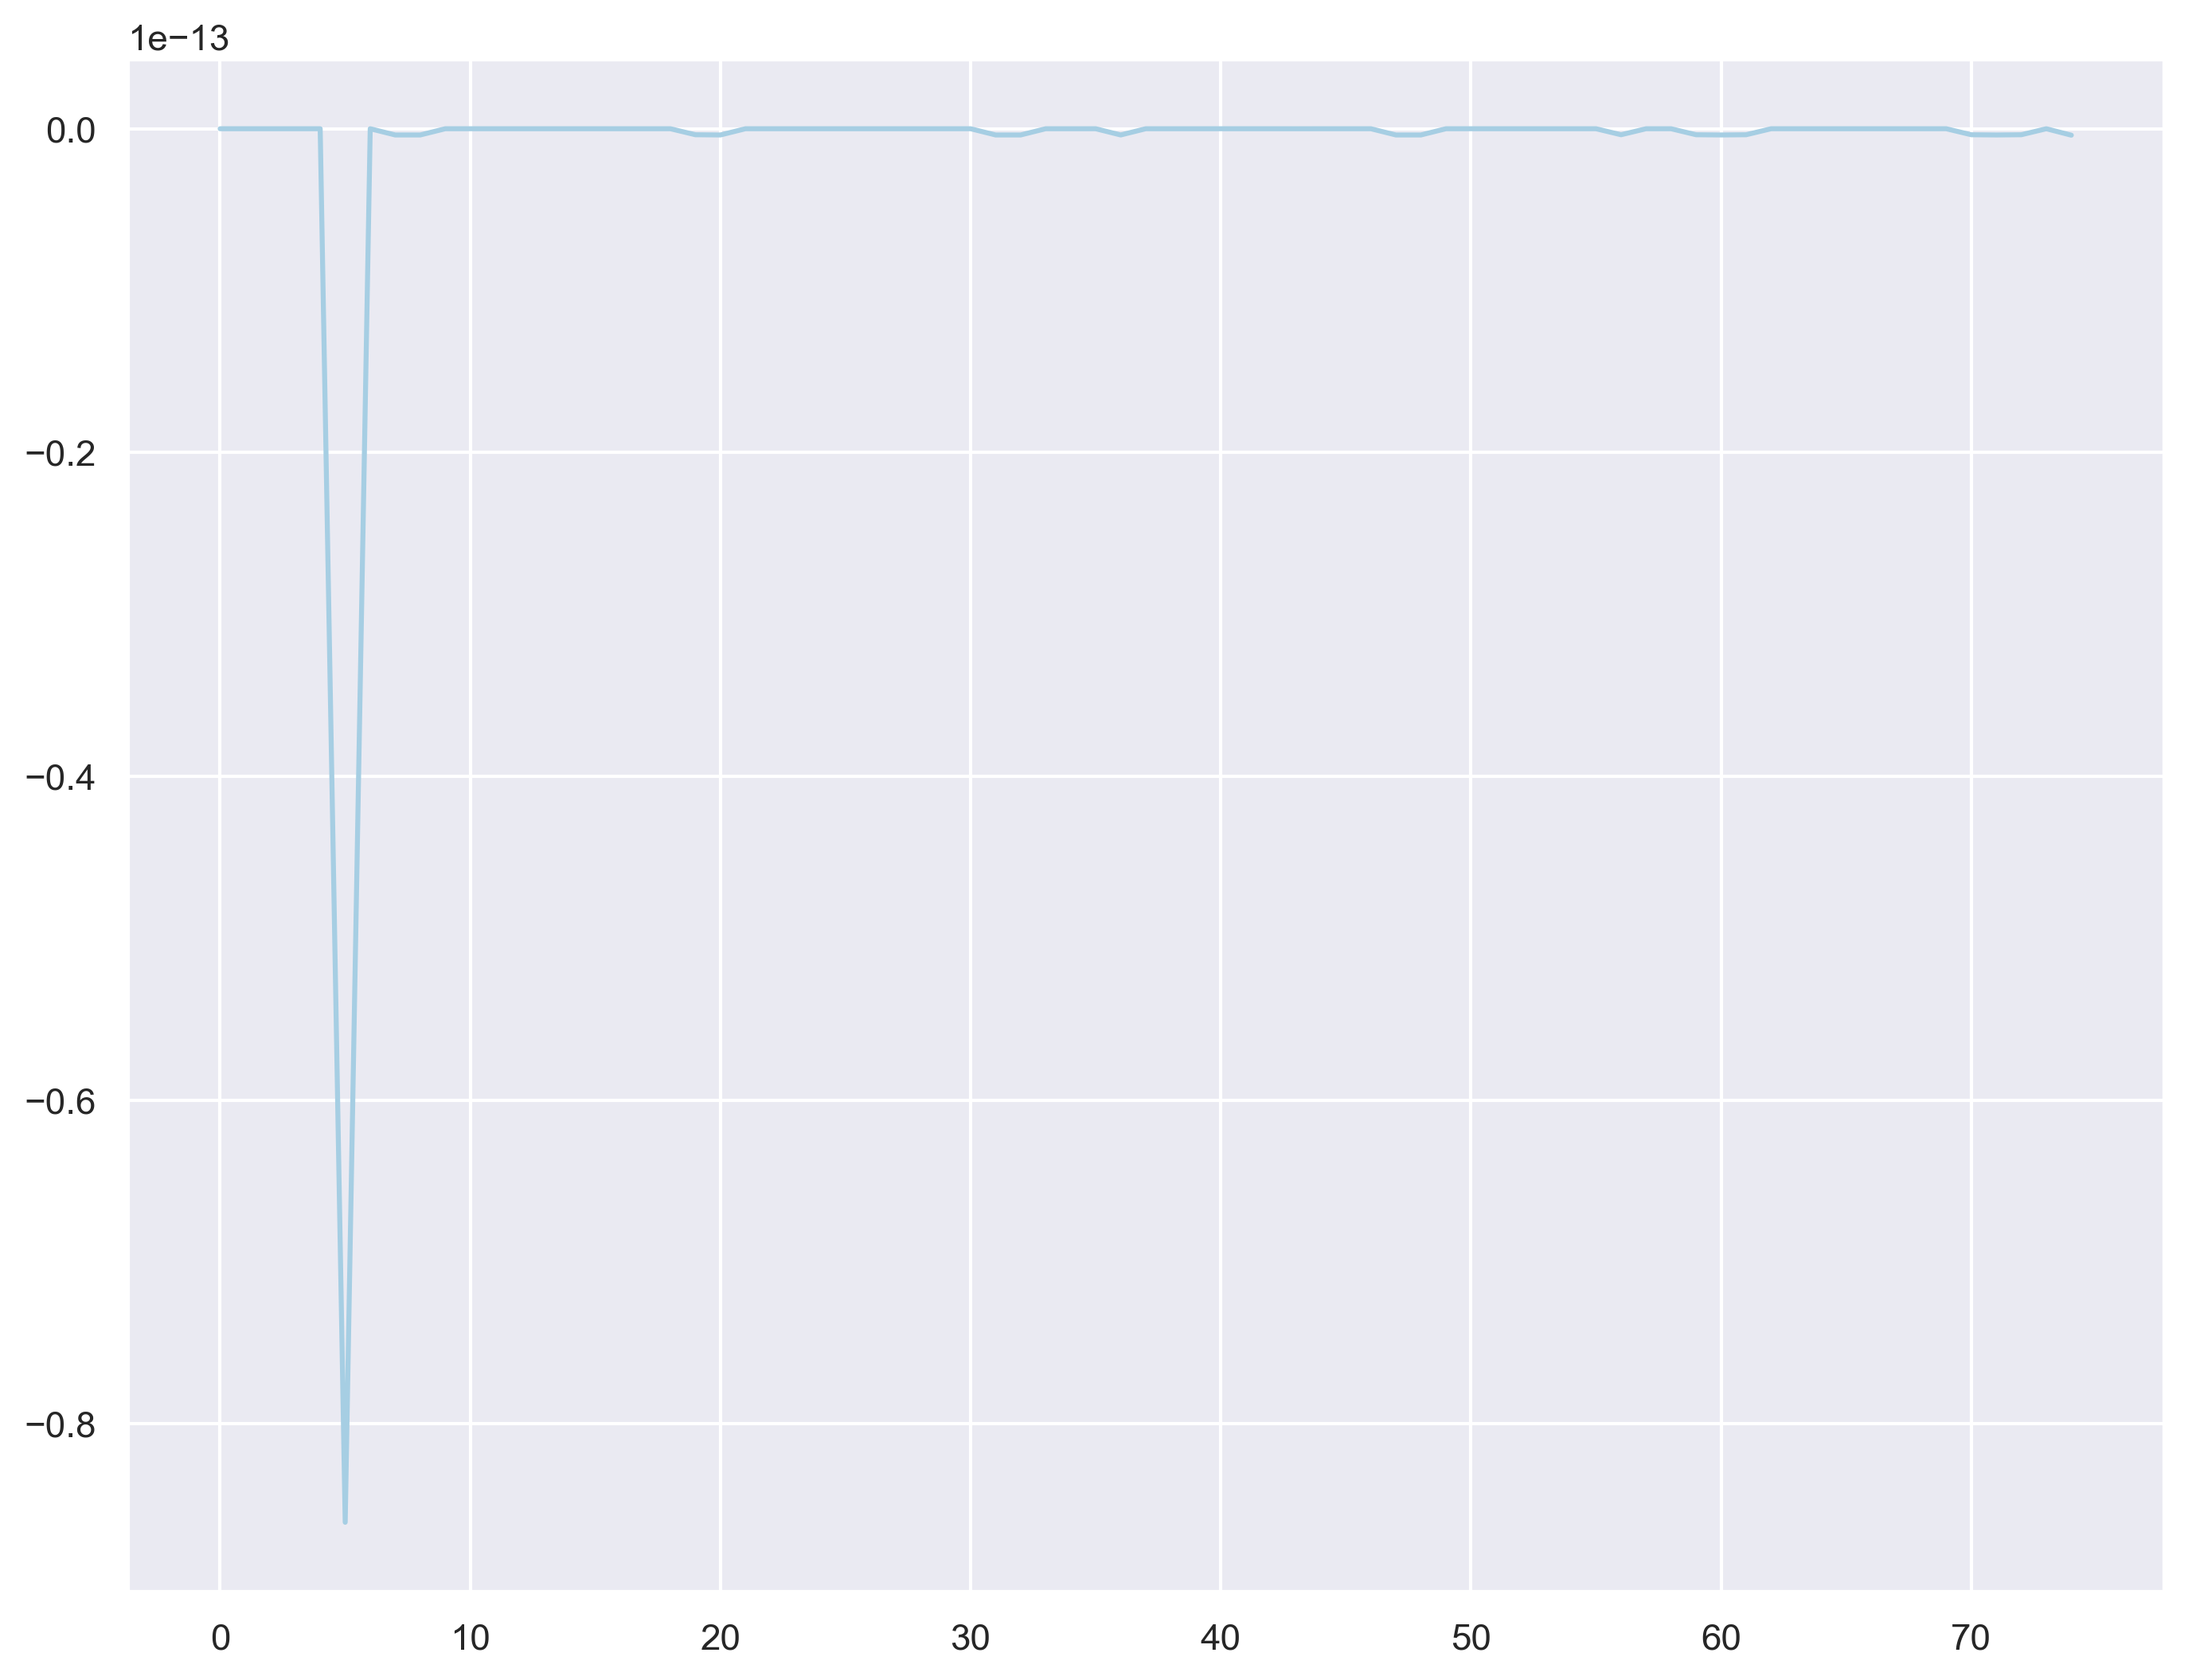

In [212]:
dt = np.dtype(float)
dt = dt.newbyteorder(">")
plt.plot(np.frombuffer(data))

In [216]:
np.frombuffer(b'\x01\x02', dtype=np.uint8)

array([1, 2], dtype=uint8)

In [217]:
np.frombuffer(b'\x01\x02\x03\x04\x05', dtype=np.uint8, count=3)

array([1, 2, 3], dtype=uint8)

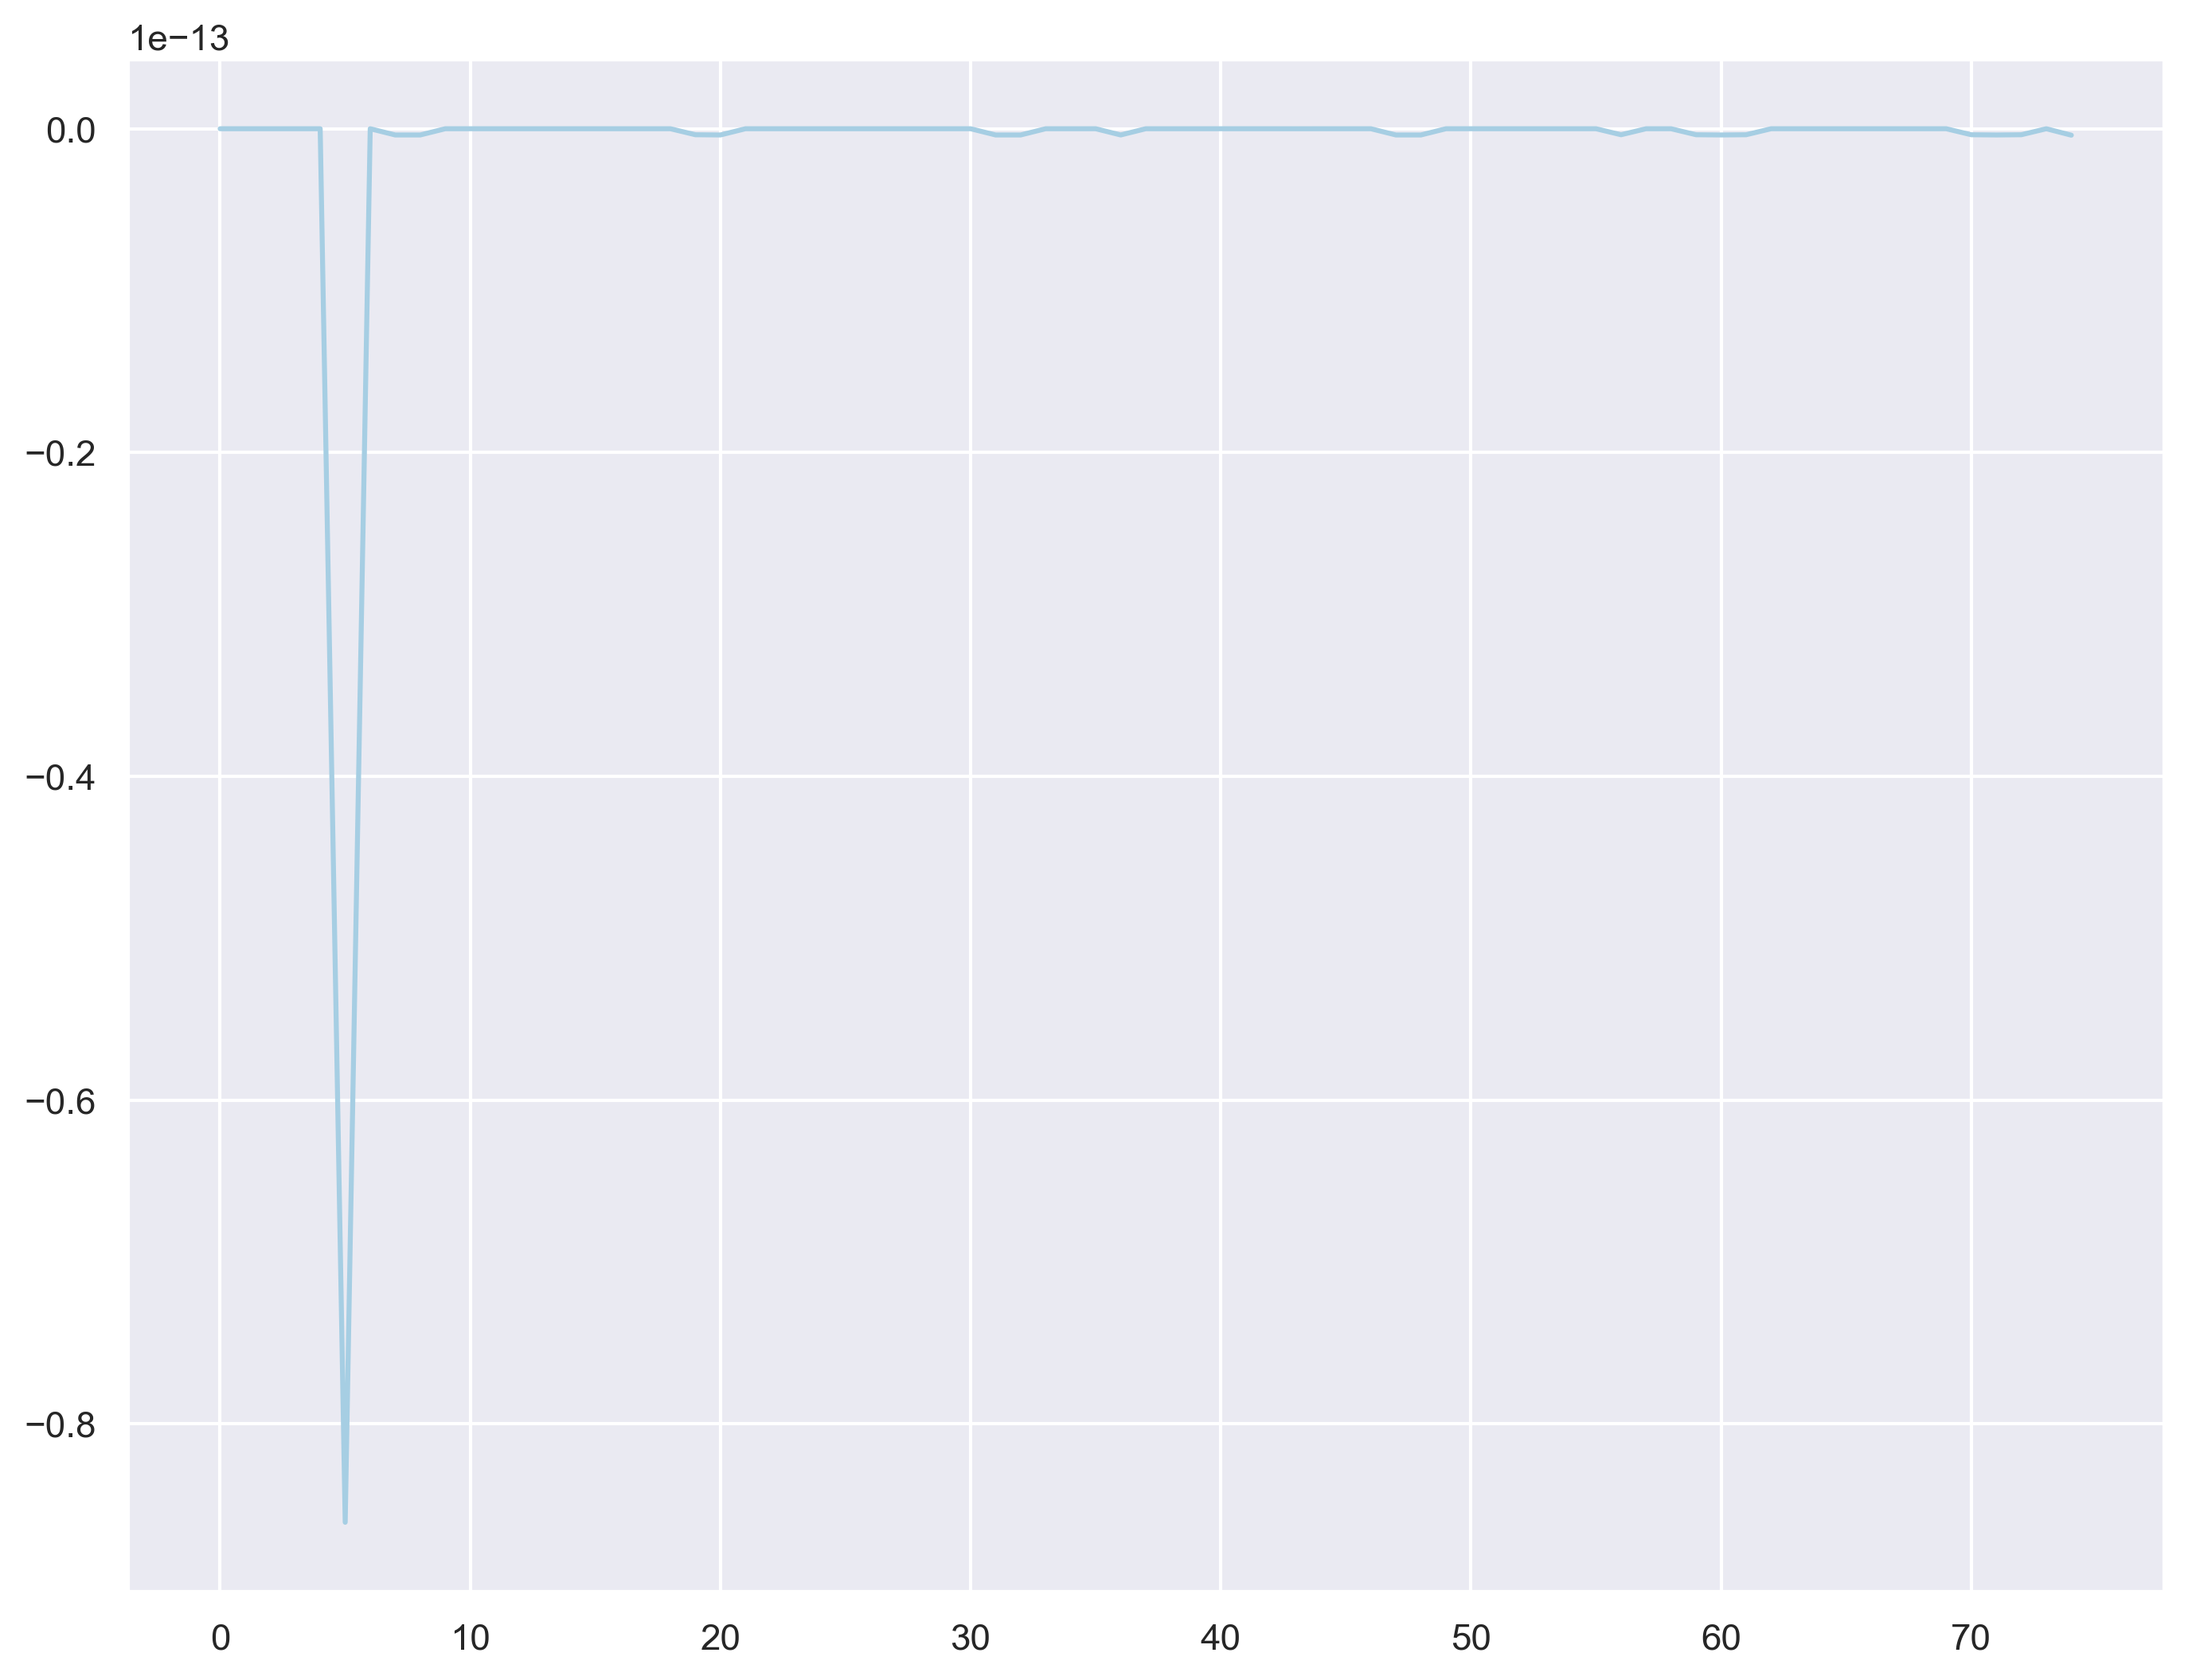

In [218]:
dt = np.dtype(float)
dt = dt.newbyteorder("<")
plt.plot(np.frombuffer(data))